<H3>    First Name: Balkattu Shreekantha Uttam
<H3>    Last Name: Kannantha
<H3>    USC ID: 9202391620
<H3>    Github UserName: Uttamkannantha

<h3> Question no:1
<h3>(a) - Download the data and set it to use

In [878]:
import seaborn
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt

#Loading arff data so as to use it as dataFrame later
data = arff.loadarff(open('../data/vertebral_column_data/column_2C_weka.arff'))

#Creating the dataFrame from the loaded data
dataFrame = pd.DataFrame(data[0])

#Converting the "normal" and "abnormal" to 0 and 1 respectively
dataFrame['class'] = dataFrame['class'].map({b'Normal':0, b'Abnormal':1})

dataFrame


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


<h3>(b) (i) -> Scatterplots

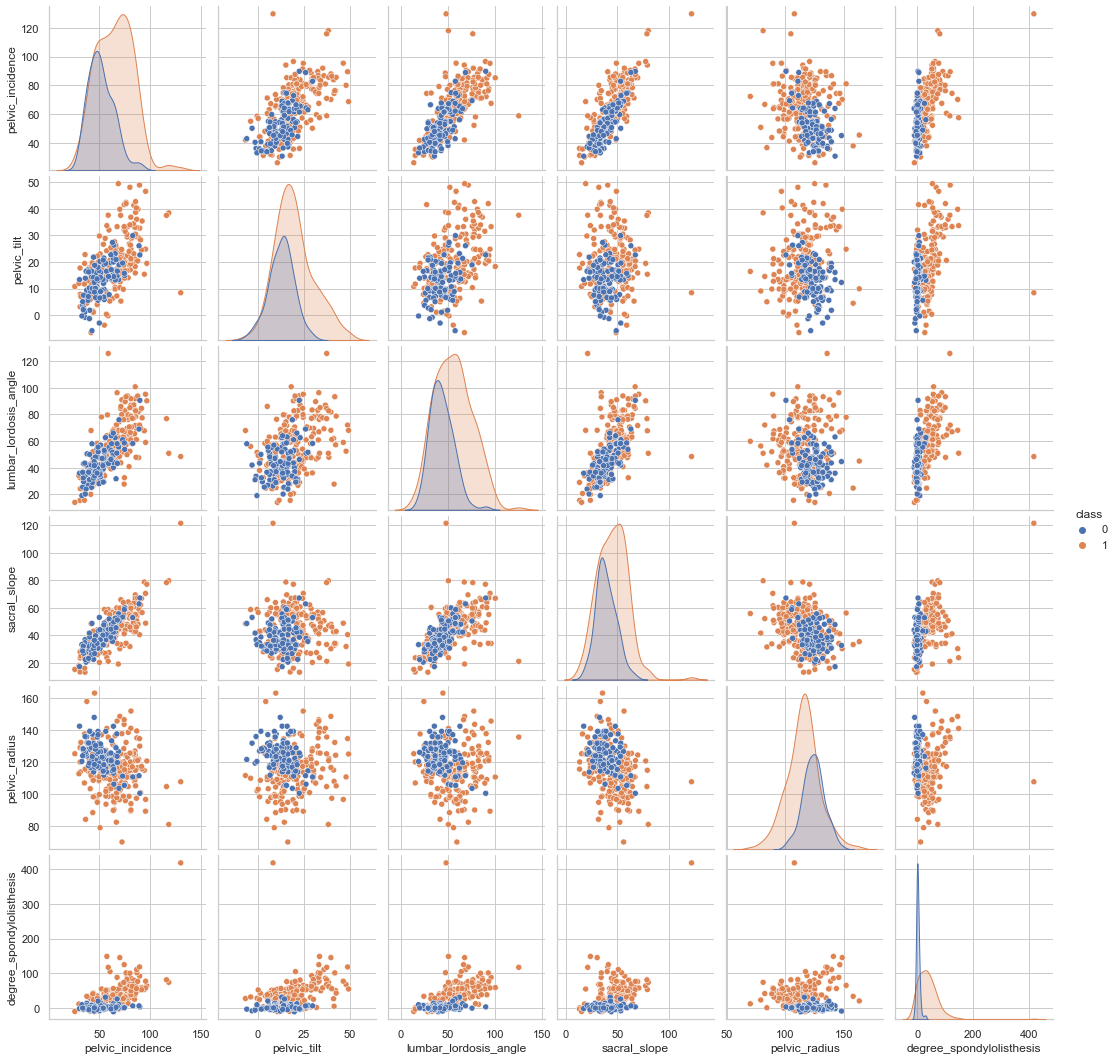

In [879]:
#Scatter plots of all the independent variables with blue = 0(normal) and orange = 1(abnormal)
seaborn.set(style='whitegrid')
 
seaborn.pairplot(dataFrame,hue="class")

<h3> (b) (ii) -> Boxplots

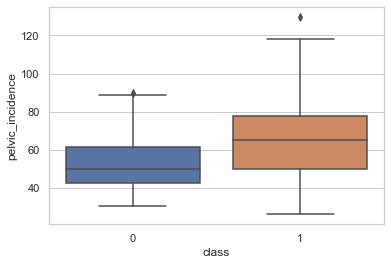

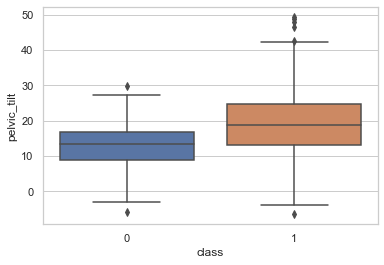

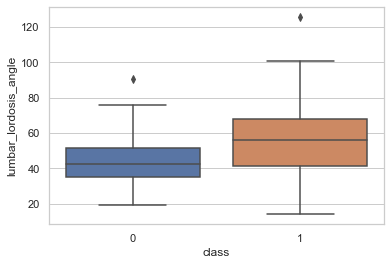

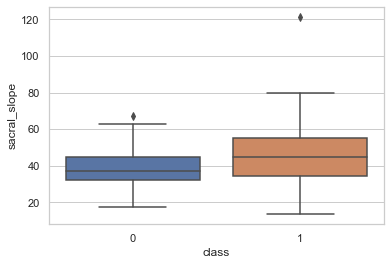

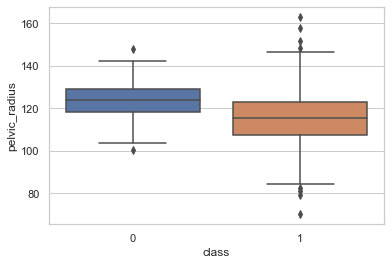

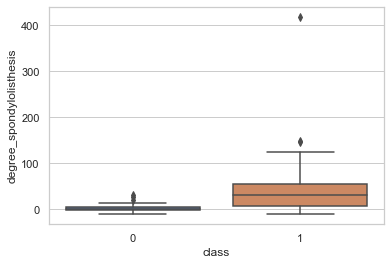

In [880]:
#Box plot for each independent variables with blue = 0(normal) and orange = 1(abnormal)

seaborn.boxplot(x=dataFrame["class"], y =dataFrame["pelvic_incidence"])
plt.show()

seaborn.boxplot(x=dataFrame["class"], y =dataFrame["pelvic_tilt"])
plt.show()

seaborn.boxplot(x=dataFrame["class"], y =dataFrame["lumbar_lordosis_angle"])
plt.show()

seaborn.boxplot(x=dataFrame["class"], y =dataFrame["sacral_slope"])
plt.show()

seaborn.boxplot(x=dataFrame["class"], y =dataFrame["pelvic_radius"])
plt.show()

seaborn.boxplot(x=dataFrame["class"], y =dataFrame["degree_spondylolisthesis"])
plt.show()

<H3> (b) (iii) -> Creating Test and Training data set

In [881]:
# data frame of class 0
normalFrame = dataFrame[210:280]

normalFrame

# data frame of class 1
abNormalFrame = dataFrame[0:140]

abNormalFrame

# Training data frame
trainedDataframe=pd.concat([abNormalFrame,normalFrame])

print("Length of Training data frame: ",len(trainedDataframe))

Length of Training data frame:  210


In [882]:
#data of class 0
normalFrameTest = dataFrame[280:]

normalFrameTest

#data of class 1
abNormalFrameTest = dataFrame[140:210]

abNormalFrameTest

#Testing data frame
trainedDataframeTest =pd.concat([abNormalFrameTest,normalFrameTest])

print("Length of Test data frame: ", len(trainedDataframeTest))

Length of Test data frame:  100


In [883]:
#Independent variables of training data
xTrain = trainedDataframe.iloc[:,0:6]

#Dependent variables of training data
yTrain = trainedDataframe.iloc[:,6]

#Independent variables of testing data
xTest = trainedDataframeTest.iloc[:,0:6]

#Dependent variables of testing data
yTest = trainedDataframeTest.iloc[:,6]

print(xTrain.shape)

(210, 6)


<h3> (c) (i) -> Classification using KNN

In [884]:
from sklearn.neighbors import KNeighborsClassifier

In [885]:
#KNN model with 4 neighbours
KNN_model = KNeighborsClassifier(n_neighbors=4)

#Fitting the model
KNN_model.fit(xTrain, yTrain)

#Predicted value
predictedValue = KNN_model.predict(xTest)

In [886]:
from sklearn.metrics import accuracy_score

#Accuracy of the model (actual vs predict)
accuracy = accuracy_score(yTest, predictedValue) *100

print("Accuracy:",accuracy)

Accuracy: 94.0


<h3> (c) (ii)
Fitting KNN on training data set with K in (1, 4, 7, ...208)

In [887]:
#Using training data set to train and test data set to test
import sys

ErrorTest_1 = []

KValues_1 = []

best_K_1 = sys.maxsize

least_Error_1 = 101

for i in range (1,208,3):

    KNN_model = KNeighborsClassifier(n_neighbors=i)

    KNN_model.fit(xTrain, yTrain)

    predictedValueTest = KNN_model.predict(xTest) #Test dataset
        
    accuracyTest = accuracy_score(yTest, predictedValueTest) 
      
    errorTest = 1-accuracyTest
    
    
    if(errorTest<least_Error_1 and i!=1): #calcualting the least error
        least_Error_1 = errorTest
        best_K_1 = i
    
    ErrorTest_1.append(round(errorTest,2))
    
    KValues_1.append(i)
    
print("Value of K at least error:",best_K_1),

print("Least error value:",least_Error_1)

Value of K at least error: 4
Least error value: 0.06000000000000005


In [888]:
#Using training dataset to train and testing on training data set 
best_K_2 = sys.maxsize

least_Error_2 = 101

KValues_2 = []

ErrorTrain_2 = []

for i in range (1,208,3):

    KNN_model = KNeighborsClassifier(n_neighbors=i)

    KNN_model.fit(xTrain, yTrain)
    
    predictedValueOnTain = KNN_model.predict(xTrain)
    
    accuracyTrain = accuracy_score(yTrain, predictedValueOnTain) 
    
    errorTrain = 1-accuracyTrain
    
    if(errorTrain<least_Error_2 ): #Calculating the minimun error
        least_Error_2 = errorTrain
        best_K_2 = i
    
    ErrorTrain_2.append(round(errorTrain,2))
    
    KValues_2.append(i)
    
    
print("Value of K at least error:",best_K_2),

print("Least error value:",least_Error_2)

Value of K at least error: 1
Least error value: 0.0


In [889]:
print ("Error Test", ErrorTest_1)

print ("Error Train", ErrorTrain_2)

print("KVal", KValues_2)

Error Test [0.13, 0.06, 0.12, 0.1, 0.12, 0.09, 0.11, 0.1, 0.11, 0.1, 0.11, 0.11, 0.11, 0.1, 0.12, 0.12, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.12, 0.13, 0.12, 0.13, 0.14, 0.16, 0.17, 0.16, 0.15, 0.16, 0.14, 0.18, 0.15, 0.16, 0.16, 0.2, 0.15, 0.22, 0.2, 0.23, 0.24, 0.27, 0.28, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
Error Train [0.0, 0.14, 0.14, 0.13, 0.14, 0.16, 0.15, 0.15, 0.14, 0.14, 0.15, 0.15, 0.15, 0.17, 0.16, 0.15, 0.16, 0.16, 0.17, 0.17, 0.16, 0.16, 0.17, 0.16, 0.17, 0.18, 0.19, 0.18, 0.17, 0.18, 0.17, 0.16, 0.15, 0.18, 0.16, 0.15, 0.17, 0.17, 0.21, 0.19, 0.21, 0.21, 0.25, 0.25, 0.29, 0.31, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33]
KVal [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97, 100, 103, 106, 109, 112, 115, 118, 121, 12

<H4>Graph of K vs Error Rate (Test and Train)

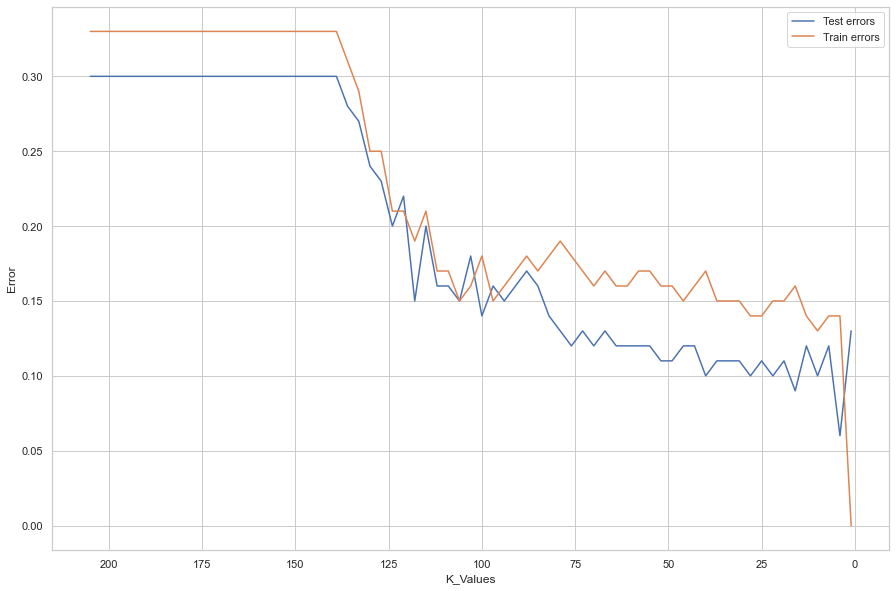

In [890]:
plt.figure(figsize = (15,10))

#Ploting K vs Test error
plt.plot(KValues_1, ErrorTest_1,label="Test errors")

#Plotting K vs Train error
plt.plot(KValues_2, ErrorTrain_2,label="Train errors")

plt.gca().invert_xaxis()

#Labels
plt.xlabel("K_Values")

plt.ylabel("Error")

plt.legend()

plt.show()

<H4> When K* = 4 error is least on test data, Hence 4 is the best number for K

<H4> Confusion Matrix

In [891]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(yTest, predictedValue).ravel()

print("Confusion matrix:")
(tn, fp, fn, tp)

Confusion matrix:


(25, 5, 1, 69)

<H4> True positivity rate or Sensitivity

In [892]:
truePositiveRateOrSensitivity = tp/(tp+fn)

print(truePositiveRateOrSensitivity)

0.9857142857142858


<H4> True negetivity rate or Specificity

In [893]:
trueNegativeRateOrSpecificity = tn/(tn+fp)

print(trueNegativeRateOrSpecificity)

0.8333333333333334


<H4> Precision score

In [894]:
from sklearn.metrics import precision_score

precision_score(yTest, predictedValue)

0.9324324324324325

<H4> F1 Score

In [895]:
from sklearn.metrics import f1_score

f1_score(yTest, predictedValue)

0.9583333333333333

<H3> (c) (iii) -> Calulaing the learning curve by calculating the best K for different size of training data set

In [896]:
errorList = []

#Varing the size of training data set
for i in range(10,220,10):
    #First N/3 rows of class 0
    trainData_zeroes = dataFrame.loc[dataFrame["class"] == 0][0:i//3]
    
    #First 2N/3 rows of class 1
    trainData_ones = dataFrame.loc[dataFrame["class"] ==1][0:i-(i//3)]
    
    trainData = pd.concat([trainData_ones,trainData_zeroes])
    
    #Independent varaibles
    xTrain = trainData.iloc[:,0:6]
    
    #Dependent variables
    yTrain = trainData.iloc[:,6]
    #print(i,len(trainData))
    
    least_Error = sys.maxsize
    
    #Varing the size of K
    for k in range (1,i,5):
        
        if(k<i):
            #print(i,k)
            KNN_model = KNeighborsClassifier(n_neighbors=k)

            KNN_model.fit(xTrain, yTrain)

            predictedValueOnTain = KNN_model.predict(xTest)

            accuracyTrain = accuracy_score(yTest, predictedValueOnTain) 

            errorTrain = 1-accuracyTrain

            if(errorTrain<least_Error):
                least_Error = errorTrain
    
    errorList.append([i,round(least_Error,2)])

    
print(errorList)  

[[10, 0.25], [20, 0.2], [30, 0.22], [40, 0.25], [50, 0.3], [60, 0.29], [70, 0.29], [80, 0.29], [90, 0.29], [100, 0.26], [110, 0.22], [120, 0.17], [130, 0.16], [140, 0.15], [150, 0.13], [160, 0.13], [170, 0.13], [180, 0.1], [190, 0.09], [200, 0.09], [210, 0.08]]


<H4> Graph of Training data size vs Min Error aka. Learning curve

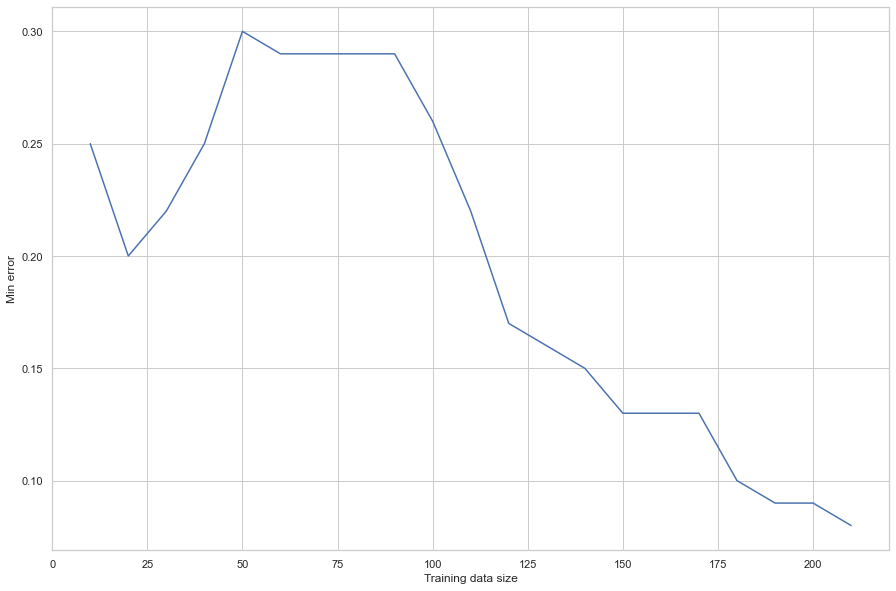

In [897]:
plt.figure(figsize = (15,10))

plt.xlabel("Training data size")
plt.ylabel("Min error")
plt.plot(*zip(*errorList))

<H3>(d) (i) Minkowski Distance

<H3>(i) A. Manhattan Distance with p = 1.

In [898]:
ErrorTest_3 = []

KValues_3 = []

best_K_3 = sys.maxsize

least_Error_3 = 101

#Varing the number of neighbours
for i in range (1,200,5):

    KNN_model = KNeighborsClassifier(n_neighbors=i,p=1)

    KNN_model.fit(xTrain, yTrain)

    predictedValueTest = KNN_model.predict(xTest)
        
    accuracyTest = accuracy_score(yTest, predictedValueTest) 
      
    errorTest = 1-accuracyTest
    
    #Calulating the minimum error
    if(errorTest<least_Error_3 and i!=1):
        least_Error_3 = errorTest
        best_K_3 = i
    
    ErrorTest_3.append(round(errorTest,2))
    
    KValues_3.append(i)


In [899]:
print("Least_error:",least_Error_3)
print("K value at least error:",best_K_3)
print(".......................")
print("K values    Error Rate")
for i in range(0,len(KValues_3)):
    print(KValues_3[i],"         ",ErrorTest_3[i])


Least_error: 0.10999999999999999
K value at least error: 6
.......................
K values    Error Rate
1           0.11
6           0.11
11           0.11
16           0.12
21           0.12
26           0.11
31           0.12
36           0.13
41           0.13
46           0.13
51           0.14
56           0.13
61           0.15
66           0.15
71           0.14
76           0.14
81           0.16
86           0.15
91           0.2
96           0.2
101           0.22
106           0.21
111           0.23
116           0.21
121           0.22
126           0.24
131           0.28
136           0.28
141           0.3
146           0.3
151           0.3
156           0.3
161           0.3
166           0.3
171           0.3
176           0.3
181           0.3
186           0.3
191           0.3
196           0.3


<H3>(i) B. -> where log10(p) ∈ {0.1,0.2,0.3,...,1}

In [900]:
import numpy as np

ErrorTest_4 = []

pValues_4 = []

best_p = sys.maxsize

least_Error_4 = 101

for i in np.logspace(0.1, 1, 10):
        
    KNN_model = KNeighborsClassifier(n_neighbors=6,p=i)#Varing p values

    KNN_model.fit(xTrain, yTrain)

    predictedValueTest = KNN_model.predict(xTest)
        
    accuracyTest = accuracy_score(yTest, predictedValueTest) 
      
    errorTest = 1-accuracyTest
    
    if(errorTest<=least_Error_4): #Calculting least error
        least_Error_4 = errorTest
        best_p = math.log(i,10)
    
    ErrorTest_4.append(round(errorTest,2))
    
    pValues_4.append(round(i,2))


In [901]:
import math

print("Least_error:",least_Error_4)
print("P value at least error:",best_p)

for i in range(0,len(pValues_4)):
    print(round(math.log(pValues_4[i],10),2),"    ",ErrorTest_4[i])

Least_error: 0.06000000000000005
P value at least error: 0.6
0.1      0.09
0.2      0.09
0.3      0.08
0.4      0.08
0.5      0.08
0.6      0.06
0.7      0.07
0.8      0.08
0.9      0.09
1.0      0.09


<H3> (i) C. -> Chebyshev Distance

In [902]:
ErrorTest_5 = []

KValues_5 = []

best_K_5 = sys.maxsize

least_Error_5 = 101

#Varing K ie. neighbours
for i in range (1,200,5):

    KNN_model = KNeighborsClassifier(n_neighbors=i,metric='chebyshev')

    KNN_model.fit(xTrain, yTrain)

    predictedValueTest = KNN_model.predict(xTest)
        
    accuracyTest = accuracy_score(yTest, predictedValueTest) 
      
    errorTest = 1-accuracyTest
    
    #Calulating least error
    if(errorTest<least_Error_5):
        least_Error_5 = errorTest
        best_K_5 = i
    
    ErrorTest_5.append(round(errorTest,2))
    
    KValues_5.append(i)


In [903]:
print("Least_error:",least_Error_5)
print("K value at least error:",best_K_5)
print(".......................")
print("K values        Error Rate")
for i in range(0,len(KValues_5)):
    print(KValues_5[i],"            ",ErrorTest_5[i])

Least_error: 0.07999999999999996
K value at least error: 16
.......................
K values        Error Rate
1              0.13
6              0.1
11              0.12
16              0.08
21              0.11
26              0.12
31              0.12
36              0.1
41              0.13
46              0.12
51              0.12
56              0.12
61              0.14
66              0.13
71              0.14
76              0.11
81              0.14
86              0.12
91              0.15
96              0.14
101              0.19
106              0.18
111              0.18
116              0.18
121              0.21
126              0.21
131              0.25
136              0.28
141              0.3
146              0.3
151              0.3
156              0.3
161              0.3
166              0.3
171              0.3
176              0.3
181              0.3
186              0.3
191              0.3
196              0.3


<H3>(d) (ii) Mahalanobis Distance

In [904]:
ErrorTest_6 = []

KValues_6 = []

best_K_6 = sys.maxsize

least_Error_6 = 101

#Varing K ie. nearest neighbours
for i in range (1,200,5):

    #Setting up KNN with Inverse co variance matrix and other parameters
    KNN_model = KNeighborsClassifier(n_neighbors=i,algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'VI': np.linalg.inv(np.cov(xTrain.T)).T})
    KNN_model.fit(xTrain, yTrain)

    predictedValueTest = KNN_model.predict(xTest)
        
    accuracyTest = accuracy_score(yTest, predictedValueTest) 
      
    errorTest = 1-accuracyTest
    
    #Calculating minimun error
    if(errorTest<least_Error_6 and i!=1):
        least_Error_6 = errorTest
        best_K_6 = i
    
    ErrorTest_6.append(round(errorTest,2))
    
    KValues_6.append(i)


In [905]:
print("Least_error:",least_Error_6)
print("K value at least error:",best_K_6)
print(".......................")
print("K values        Error Rate")
for i in range(0,len(KValues_6)):
    print(KValues_6[i],"            ",ErrorTest_6[i])

Least_error: 0.16000000000000003
K value at least error: 6
.......................
K values        Error Rate
1              0.14
6              0.16
11              0.18
16              0.17
21              0.18
26              0.18
31              0.18
36              0.18
41              0.2
46              0.18
51              0.21
56              0.21
61              0.22
66              0.22
71              0.24
76              0.24
81              0.24
86              0.26
91              0.25
96              0.24
101              0.24
106              0.23
111              0.26
116              0.25
121              0.27
126              0.28
131              0.3
136              0.3
141              0.3
146              0.3
151              0.3
156              0.3
161              0.3
166              0.3
171              0.3
176              0.3
181              0.3
186              0.3
191              0.3
196              0.3


<H3> (e) Euclidean

In [906]:
ErrorTest_7 = []

KValues_7 = []

best_K_7 = sys.maxsize

least_Error_7 = 101

for i in range (1,200,5):
    
    #Setting KNN with weight as distance and measurement metric as euclidean 
    KNN_model = KNeighborsClassifier(n_neighbors=i, metric ="euclidean", weights = "distance")

    KNN_model.fit(xTrain, yTrain)

    predictedValueTest = KNN_model.predict(xTest)
        
    accuracyTest = accuracy_score(yTest, predictedValueTest) 
      
    errorTest = 1-accuracyTest
    
    
    if(errorTest<least_Error_7):
        least_Error_7 = errorTest
        best_K_7 = i
    
    ErrorTest_7.append(round(errorTest,2))
    
    KValues_7.append(i)

In [907]:
print("Least_error:",least_Error_7)
print("K value at least error:",best_K_7)
print(".......................")
print("K values        Error Rate")
for i in range(0,len(KValues_7)):
    print(KValues_7[i],"            ",ErrorTest_7[i])

Least_error: 0.09999999999999998
K value at least error: 6
.......................
K values        Error Rate
1              0.13
6              0.1
11              0.12
16              0.11
21              0.11
26              0.11
31              0.11
36              0.11
41              0.11
46              0.11
51              0.11
56              0.11
61              0.11
66              0.11
71              0.11
76              0.12
81              0.12
86              0.13
91              0.14
96              0.14
101              0.12
106              0.14
111              0.14
116              0.13
121              0.13
126              0.13
131              0.14
136              0.14
141              0.17
146              0.19
151              0.19
156              0.2
161              0.23
166              0.25
171              0.27
176              0.27
181              0.27
186              0.27
191              0.28
196              0.28


<H4> Manhattan

In [908]:
ErrorTest_8 = []

KValues_8 = []

best_K_8 = sys.maxsize

least_Error_8 = 101

for i in range (1,200,5):

    #Setting KNN with weight as distance and measurement metric as manhattan 
    KNN_model = KNeighborsClassifier(n_neighbors=i, metric ="manhattan", weights = "distance")

    KNN_model.fit(xTrain, yTrain)

    predictedValueTest = KNN_model.predict(xTest)
        
    accuracyTest = accuracy_score(yTest, predictedValueTest) 
      
    errorTest = 1-accuracyTest
    
    
    if(errorTest<least_Error_8):
        least_Error_8 = errorTest
        best_K_8 = i
    
    ErrorTest_8.append(round(errorTest,2))
    
    KValues_8.append(i)

In [909]:
print("Least_error:",least_Error_8)
print("K value at least error:",best_K_8)
print(".......................")
print("K values        Error Rate")
for i in range(0,len(KValues_8)):
    print(KValues_8[i],"            ",ErrorTest_8[i])

Least_error: 0.09999999999999998
K value at least error: 26
.......................
K values        Error Rate
1              0.11
6              0.11
11              0.11
16              0.12
21              0.11
26              0.1
31              0.11
36              0.11
41              0.11
46              0.11
51              0.12
56              0.12
61              0.13
66              0.13
71              0.11
76              0.12
81              0.14
86              0.14
91              0.13
96              0.13
101              0.15
106              0.15
111              0.15
116              0.15
121              0.15
126              0.15
131              0.15
136              0.16
141              0.17
146              0.18
151              0.19
156              0.21
161              0.24
166              0.25
171              0.27
176              0.27
181              0.27
186              0.27
191              0.28
196              0.29


<H4> Chebyshev

In [910]:
ErrorTest_9 = []

KValues_9 = []

best_K_9 = sys.maxsize

least_Error_9 = 101

for i in range (1,200,5):

    #Setting KNN with weight as distance and measurement metric as chebyshev 
    KNN_model = KNeighborsClassifier(n_neighbors=i, metric ="chebyshev", weights = "distance")

    KNN_model.fit(xTrain, yTrain)

    predictedValueTest = KNN_model.predict(xTest)
        
    accuracyTest = accuracy_score(yTest, predictedValueTest) 
      
    errorTest = 1-accuracyTest
    
    
    if(errorTest<least_Error_9):
        least_Error_9 = errorTest
        best_K_9 = i
    
    ErrorTest_9.append(round(errorTest,2))
    
    KValues_9.append(i)

In [911]:
print("Least_error:",least_Error_9)
print("K value at least error:",best_K_9)
print(".......................")
print("K values        Error Rate")
for i in range(0,len(KValues_9)):
    print(KValues_9[i],"            ",ErrorTest_9[i])

Least_error: 0.10999999999999999
K value at least error: 16
.......................
K values        Error Rate
1              0.13
6              0.13
11              0.12
16              0.11
21              0.12
26              0.12
31              0.11
36              0.11
41              0.11
46              0.12
51              0.12
56              0.12
61              0.11
66              0.13
71              0.12
76              0.12
81              0.12
86              0.14
91              0.13
96              0.14
101              0.14
106              0.14
111              0.14
116              0.14
121              0.15
126              0.14
131              0.16
136              0.16
141              0.18
146              0.19
151              0.21
156              0.21
161              0.23
166              0.26
171              0.26
176              0.26
181              0.27
186              0.27
191              0.27
196              0.28


<H3> Summary of Aglorithims with Metrics and Weights
         
| Algorithm:  | Euclidean   | Manhattan   | Chebyshev   |
| ----------- | ----------- | ----------- | ----------- |
|Least Error: | 0.099       | 0.099       | 0.109       |
|Best K (or P)| 6           | 26          | 16          |

<H3> Least error is achieved in this homework is 0.0 ie when K =1 in KNN where we trained the model and tested it with the same independent values.

<H4>References

https://pymfe.readthedocs.io/en/latest/auto_examples/03_miscellaneous_examples/plot_using_pandas_csv_arff.html
https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
https://en.wikipedia.org/wiki/Sensitivity_and_specificity
https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html